In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def f(x, gamma):

    return np.cosh(x)+np.cos(x)-gamma


In [3]:
def fn(x):

    return np.cosh(x)+np.cos(x)-3


In [4]:

print(fn(1))


-0.9166170593166165


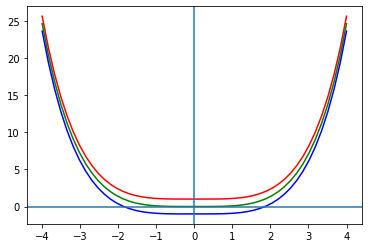

In [15]:
x = np.linspace(-4, 4, 50)
plt.plot(x, f(x, 1), color="r")
plt.plot(x, f(x, 2), color="g")
plt.plot(x, f(x, 3), color="b")
plt.axhline(0)
plt.axvline(0)
plt.show()


<centre><h1>Dichotomie</h1></centre>

In [7]:
import math


def dichotomie(f, a, b, n, max):
    m = math.ceil(np.log2((b-a)/n))
    if(f(a)*f(b) > 0):
        return "pas de solution"
    for i in range(min(max, int(m))):
        c = (a+b)/2
        if (f(a)*f(c) < 0):
            b = c
        else:
            a = c
    return c, i


In [8]:
print(dichotomie(fn, 1, 3, 10**(-15), 100))


(1.8579208291501983, 50)


<centre><h1>Newton</h1></centre>

In [9]:
def newton(x, f, tol, maxit):
    def fp(x): return (f(x+tol)-f(x))/tol
    i = 0
    while(abs(f(x)) > tol and i < maxit):
        x = x-(f(x)/fp(x))
        i += 1
    if(i > maxit):
        return("diverge")
    return (x, i)


In [10]:
newton(1, fn, 10**(-15), 100)


(1.8579208291501985, 15)

<centre><h1>Lagrange</h1></centre>

In [11]:
def fx(x):
    return 2*x*np.exp(-(4*x+2))


In [12]:
def lagrange(x, y, t):
    l = []
    p = 0
    n = len(x)
    for i in range(n):
        for j in range(n):
            if i != j:
                l.append((t-x[j])/(x[i]-x[j]))
        p += l[i]*y[i]
    return p


In [13]:
x = [0.2, 1]
y = [fx(0.2), fx(1)]
print(lagrange(x, y, 0.5))


0.017061579788804262


<centre><h1>Point fixe</h1></centre>

In [18]:
def pointFixe(g, x, eps, nbmax):
    nb = 0
    while(abs(g(x)-x) > eps and nbmax > nb):
        nb = nb+1
        x = g(x)
    return x, nb


In [19]:
import math
import numpy as np


def g(x):
    return(np.cosh(x)+np.cos(x)-3)


In [20]:
print(pointFixe(g, 1, 10e-10, 100))

(-0.9360068770705698, 15)


<centre><h1>Fonction prédéfinie</h1></centre>

In [21]:
import scipy.optimize
sol = scipy.optimize.fsolve(g, 1)
print(sol)

[1.85792083]
